In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
RANDOM_STATE = 42

In [14]:
data_file = "house_price_data.csv"
df = pd.read_csv(data_file)

print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)

display(df.head())
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False))

Shape: (8000, 25)

Columns:
 ['property_id', 'neighborhood', 'distance_to_city_center', 'distance_to_metro', 'distance_to_school', 'crime_rate', 'house_age', 'total_area', 'bedrooms', 'bathrooms', 'floors', 'garage', 'garden', 'basement', 'balcony', 'construction_quality', 'renovation_status', 'heating_type', 'air_conditioning', 'parking_spaces', 'energy_efficiency', 'listing_duration', 'season_sold', 'year_sold', 'sale_price']

Dtypes:
 property_id                 object
neighborhood                object
distance_to_city_center    float64
distance_to_metro            int64
distance_to_school           int64
crime_rate                 float64
house_age                    int64
total_area                   int64
bedrooms                     int64
bathrooms                    int64
floors                       int64
garage                       int64
garden                       int64
basement                     int64
balcony                      int64
construction_quality        objec

property_id neighborhood  distance_to_city_center  distance_to_metro  \
0  PROP_000001  Forest Glen                      6.6                908   
1  PROP_000002     Lakeside                      2.6                 84   
2  PROP_000003     Downtown                     10.2                 50   
3  PROP_000004    Riverside                      5.1                475   
4  PROP_000005      Oakwood                      0.5                647   

   distance_to_school  crime_rate  house_age  total_area  bedrooms  bathrooms  \
0                 296         1.0         22         103         3          3   
1                  30         1.0         12         114         2          2   
2                 120         1.0         21          83         5          3   
3                  48         1.0          0         127         3          1   
4                 111         1.0         21          59         6          2   

   ...  construction_quality  renovation_status  heating_type  \
0  ...                 Basic               Full           Gas   
1  ...              Standard              Never           Gas   
2  ...               Premium              Never       Central   
3  ...              Standard               Full       Central   
4  ...              Standard              Never       Central   

   air_conditioning  parking_spaces energy_efficiency listing_duration  \
0                 0               2                 D                1   
1                 1               0                 A               17   
2                 1               1                 C                4   
3                 1               1                 D               55   
4                 0               0                 C               15   

  season_sold  year_sold  sale_price  
0      Winter       2022       342.8  
1        Fall       2023       545.0  
2      Summer       2021       710.1  
3      Winter       2023       894.5  
4        Fall       2023       258.4  

[5 rows x 25 columns]


Missing values per column:
 property_id                0
neighborhood               0
distance_to_city_center    0
distance_to_metro          0
distance_to_school         0
crime_rate                 0
house_age                  0
total_area                 0
bedrooms                   0
bathrooms                  0
floors                     0
garage                     0
garden                     0
basement                   0
balcony                    0
construction_quality       0
renovation_status          0
heating_type               0
air_conditioning           0
parking_spaces             0
energy_efficiency          0
listing_duration           0
season_sold                0
year_sold                  0
sale_price                 0
dtype: int64


In [15]:
# Summary statistics
display(df.describe(include='all').T)

# Identify numeric & categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nNumeric columns:", num_cols)
print("Categorical columns:", cat_cols)

count unique          top  freq         mean  \
property_id                8000   8000  PROP_007984     1          NaN   
neighborhood               8000     15     Lakeside   582          NaN   
distance_to_city_center  8000.0    NaN          NaN   NaN     3.785213   
distance_to_metro        8000.0    NaN          NaN   NaN    337.53625   
distance_to_school       8000.0    NaN          NaN   NaN   148.724875   
crime_rate               8000.0    NaN          NaN   NaN          1.0   
house_age                8000.0    NaN          NaN   NaN    14.295125   
total_area               8000.0    NaN          NaN   NaN   150.608125   
bedrooms                 8000.0    NaN          NaN   NaN       3.3595   
bathrooms                8000.0    NaN          NaN   NaN     2.502875   
floors                   8000.0    NaN          NaN   NaN      1.80825   
garage                   8000.0    NaN          NaN   NaN        0.698   
garden                   8000.0    NaN          NaN   NaN     0.598875   
basement                 8000.0    NaN          NaN   NaN     0.389625   
balcony                  8000.0    NaN          NaN   NaN     0.504375   
construction_quality       8000      3     Standard  4029          NaN   
renovation_status          8000      3        Never  3227          NaN   
heating_type               8000      3      Central  4014          NaN   
air_conditioning         8000.0    NaN          NaN   NaN       0.4005   
parking_spaces           8000.0    NaN          NaN   NaN     1.400375   
energy_efficiency          8000      7            D  2049          NaN   
listing_duration         8000.0    NaN          NaN   NaN    29.411625   
season_sold                8000      4       Summer  2764          NaN   
year_sold                8000.0    NaN          NaN   NaN  2021.591625   
sale_price               8000.0    NaN          NaN   NaN     725.1814   

                                std     min      25%     50%       75%     max  
property_id                     NaN     NaN      NaN     NaN       NaN     NaN  
neighborhood                    NaN     NaN      NaN     NaN       NaN     NaN  
distance_to_city_center    3.953137     0.5      1.0     2.5       5.1    25.0  
distance_to_metro        350.469891    50.0    94.75   221.0     455.0  3000.0  
distance_to_school       165.435271    30.0     35.0    90.0     194.0  1748.0  
crime_rate                      0.0     1.0      1.0     1.0       1.0     1.0  
house_age                 14.677669     0.0      4.0    10.0      20.0   100.0  
total_area                83.534599    50.0     86.0   134.0     196.0   500.0  
bedrooms                   1.129345     1.0      3.0     3.0       4.0     6.0  
bathrooms                  0.802074     1.0      2.0     3.0       3.0     4.0  
floors                     0.600231     1.0      1.0     2.0       2.0     3.0  
garage                     0.459154     0.0      0.0     1.0       1.0     1.0  
garden                     0.490157     0.0      0.0     1.0       1.0     1.0  
basement                   0.487696     0.0      0.0     0.0       1.0     1.0  
balcony                    0.500012     0.0      0.0     1.0       1.0     1.0  
construction_quality            NaN     NaN      NaN     NaN       NaN     NaN  
renovation_status               NaN     NaN      NaN     NaN       NaN     NaN  
heating_type                    NaN     NaN      NaN     NaN       NaN     NaN  
air_conditioning            0.49003     0.0      0.0     0.0       1.0     1.0  
parking_spaces              0.92273     0.0      1.0     1.0       2.0     3.0  
energy_efficiency               NaN     NaN      NaN     NaN       NaN     NaN  
listing_duration          29.499529     1.0      8.0    20.0      42.0   200.0  
season_sold                     NaN     NaN      NaN     NaN       NaN     NaN  
year_sold                  1.065597  2020.0   2021.0  2022.0    2022.0  2023.0  
sale_price               350.856932    80.0  416.375   684.6  1108.375  1200


Numeric columns: ['distance_to_city_center', 'distance_to_metro', 'distance_to_school', 'crime_rate', 'house_age', 'total_area', 'bedrooms', 'bathrooms', 'floors', 'garage', 'garden', 'basement', 'balcony', 'air_conditioning', 'parking_spaces', 'listing_duration', 'year_sold', 'sale_price']
Categorical columns: ['property_id', 'neighborhood', 'construction_quality', 'renovation_status', 'heating_type', 'energy_efficiency', 'season_sold']


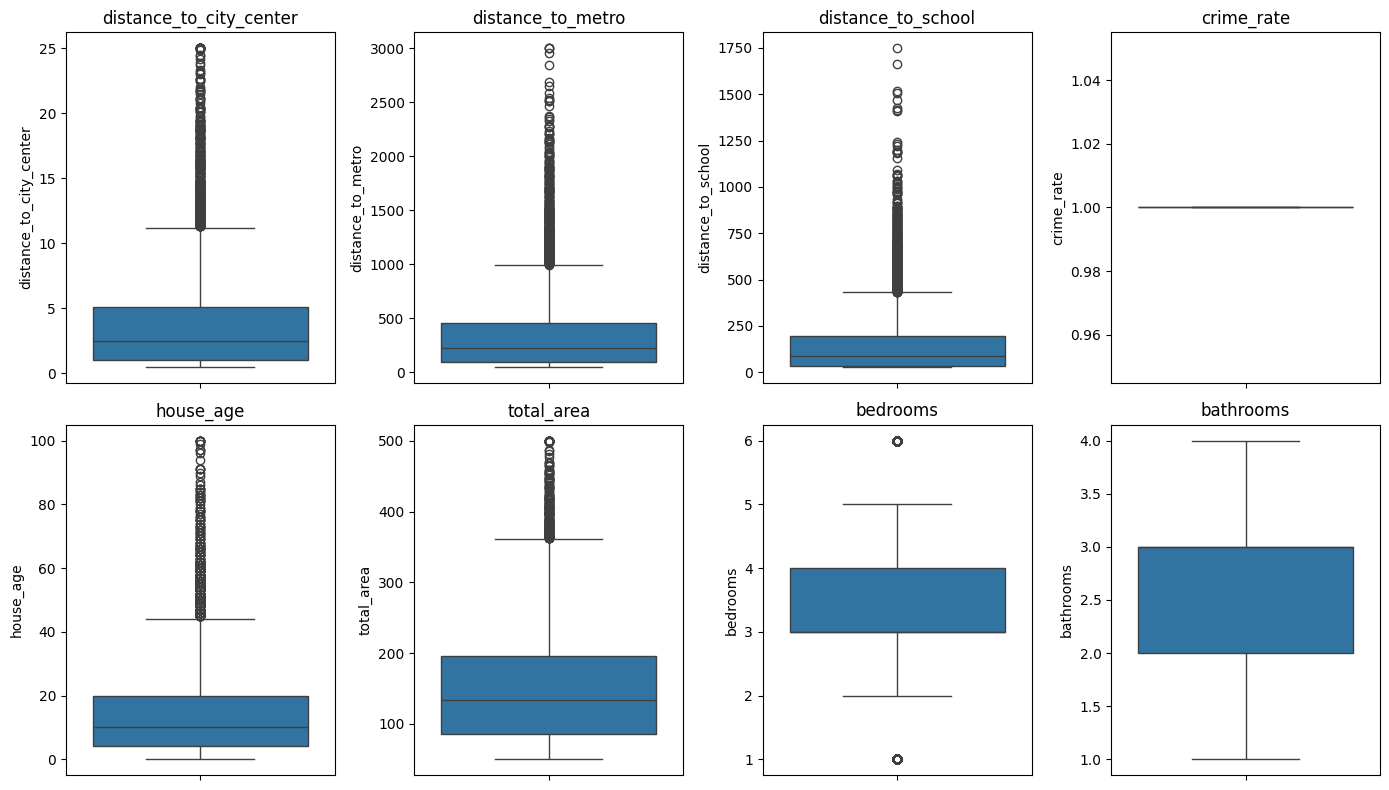


Outlier counts (IQR rule):
distance_to_city_center : 464
distance_to_metro : 423
distance_to_school : 509
crime_rate : 0
house_age : 378
total_area : 193
bedrooms : 675
bathrooms : 0
floors : 0
garage : 0
garden : 0
basement : 0
balcony : 0
air_conditioning : 0
parking_spaces : 0
listing_duration : 349
year_sold : 0


In [16]:
plt.figure(figsize=(14, 8))
for i, col in enumerate([c for c in num_cols if c != 'sale_price'][:8], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Identify extreme outliers using IQR rule (per numeric column)
outlier_counts = {}
for col in [c for c in num_cols if c != 'sale_price']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_counts[col] = ((df[col] < lower) | (df[col] > upper)).sum()
print("\nOutlier counts (IQR rule):")
for k, v in outlier_counts.items():
    print(k, ":", v)

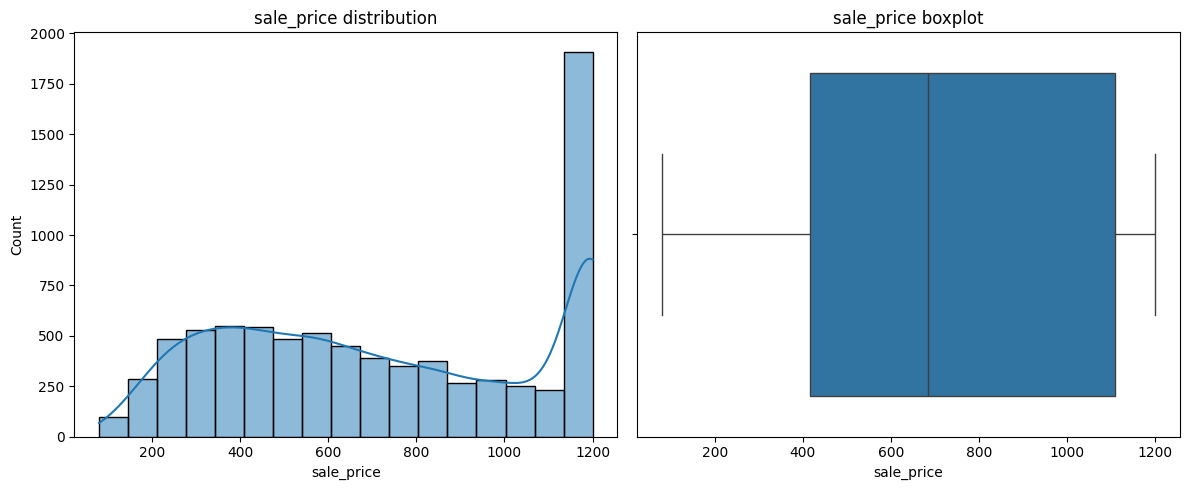

Skewness of sale_price: 0.07300029773629817


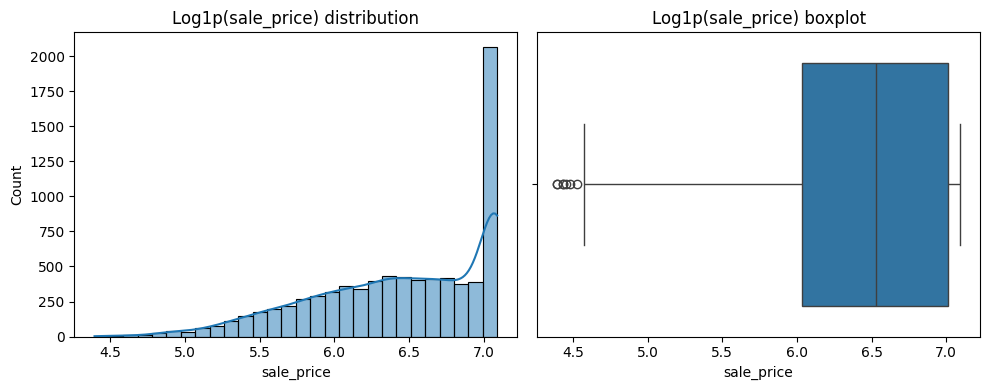

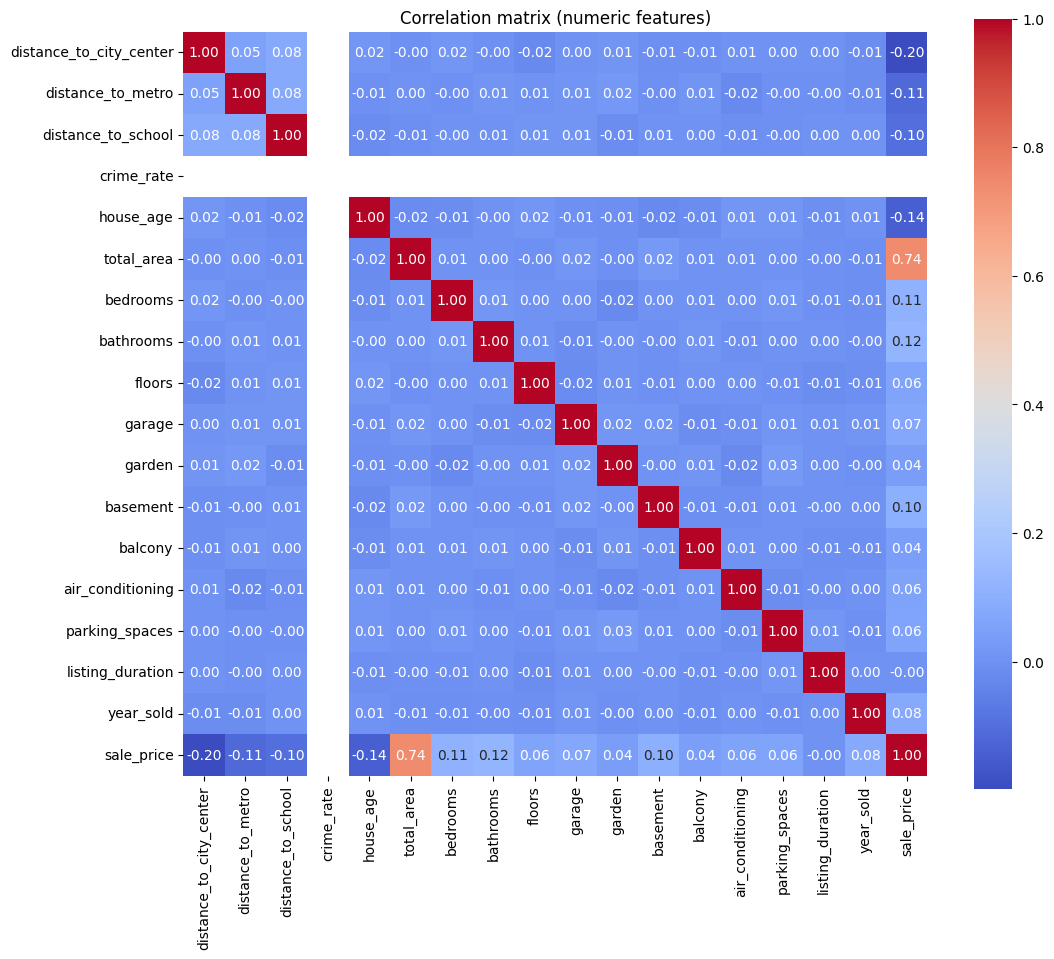


Calculating VIF for numeric features (this can take time if many cols)


feature           VIF
2           crime_rate  3.603081e+06
1   distance_to_school  1.013575e+00
0    distance_to_metro  1.009969e+00
9               garden  1.002940e+00
3            house_age  1.002711e+00
8               garage  1.002032e+00
13      parking_spaces  1.001776e+00
12    air_conditioning  1.001760e+00
10            basement  1.001659e+00
7               floors  1.001638e+00
5             bedrooms  1.001525e+00
4           total_area  1.001521e+00
11             balcony  1.001198e+00
15           year_sold  1.000876e+00
6            bathrooms  1.000733e+00
14    listing_duration  1.000681e+00

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['sale_price'], kde=True)
plt.title("sale_price distribution")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['sale_price'])
plt.title("sale_price boxplot")
plt.tight_layout()
plt.show()

print("Skewness of sale_price:", df['sale_price'].skew())

# If highly skewed, show log transform effect
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(np.log1p(df['sale_price']), kde=True)
plt.title("Log1p(sale_price) distribution")
plt.subplot(1,2,2)
sns.boxplot(x=np.log1p(df['sale_price']))
plt.title("Log1p(sale_price) boxplot")
plt.tight_layout()
plt.show()

# 2.2 Location impact: average price by neighbourhood (if exists)
if 'neighbourhood' in df.columns:
    top_neigh = df.groupby('neighbourhood')['sale_price'].mean().sort_values(ascending=False).head(15)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_neigh.values, y=top_neigh.index)
    plt.title("Top 15 neighbourhoods by avg sale_price")
    plt.xlabel("Avg sale_price (thousands)")
    plt.show()

# 2.3 Relationships with some property features (example: area, rooms, age)
for col in ['area', 'rooms', 'age']:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=col, y='sale_price', alpha=0.5)
        sns.regplot(data=df, x=col, y='sale_price', scatter=False, ci=None)
        plt.title(f"sale_price vs {col}")
        plt.show()

# 2.4 Quality factors and season/year effects
if 'sale_season' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='sale_season', y='sale_price', data=df)
    plt.title("sale_price by Sale Season")
    plt.show()

if 'sale_year' in df.columns:
    yearly = df.groupby('sale_year')['sale_price'].median()
    plt.figure(figsize=(8,4))
    sns.lineplot(x=yearly.index, y=yearly.values)
    plt.title("Median sale_price by Year")
    plt.show()

# 2.5 Correlation heatmap for numeric features
plt.figure(figsize=(12,10))
num_for_corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(num_for_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation matrix (numeric features)")
plt.show()

# Check multicollinearity via VIF (use a subset of numeric features)
print("\nCalculating VIF for numeric features (this can take time if many cols)")
vif_df = pd.DataFrame()
vif_features = [c for c in num_cols if c != 'sale_price']  # predictors only
X_vif = df[vif_features].dropna()  # remove rows with missing numeric data temporarily
X_vif_const = sm.add_constant(X_vif)
vifs = []
for i in range(1, X_vif_const.shape[1]):  # skip const
    try:
        vifs.append(variance_inflation_factor(X_vif_const.values, i))
    except Exception:
        vifs.append(np.nan)
vif_df['feature'] = X_vif_const.columns[1:]
vif_df['VIF'] = vifs
display(vif_df.sort_values('VIF', ascending=False).head(20))

In [18]:
data = df.copy()

# 3.1 Handle missing values (basic strategy)
# Numeric: median imputation; Categorical: fill with 'Missing'
num_impute = SimpleImputer(strategy='median')
cat_impute = SimpleImputer(strategy='constant', fill_value='Missing')

# Identify columns again after copy
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
if 'sale_price' in num_cols:
    num_cols.remove('sale_price')

# 3.2 Create a few engineered features if relevant (examples)
# - price_per_area
if 'area' in data.columns and 'sale_price' in data.columns:
    # avoid division by zero
    data['price_per_area'] = data['sale_price'] / (data['area'].replace(0, np.nan))
    data['price_per_area'].fillna(data['price_per_area'].median(), inplace=True)

# - age_bins
if 'age' in data.columns:
    data['age_bin'] = pd.cut(data['age'], bins=[-1, 10, 30, 60, 1000], labels=['new','young','mid','old'])

# - amenity count (if there is an amenities column as list/string, example)
if 'amenities' in data.columns:
    # if amenities is a string with separators, count items
    data['amenity_count'] = data['amenities'].fillna('').apply(lambda x: len(str(x).split(';')) if x else 0)

# 3.3 Deal with outliers (IQR capping for numeric cols)
for col in num_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # cap
    data[col] = np.where(data[col] < lower, lower, data[col])
    data[col] = np.where(data[col] > upper, upper, data[col])

# 3.4 Prepare column lists for pipeline
num_transformers = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformers = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # updated
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformers, num_cols),
    ('cat', cat_transformers, cat_cols)
], remainder='drop')  # drop any other columns not listed

# 3.5 Optional: transform target if skewed (log1p)
transform_target = False
if df['sale_price'].skew() > 1.0:
    transform_target = True
    print("Target is skewed; will use log1p transform during training.")

# 3.6 Split data
X = data.drop(columns=['sale_price'])
y = data['sale_price'].copy()
if transform_target:
    y = np.log1p(y)

# Keep a small test set for final validation
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)
# We'll further split train into train/validation if desired, but linear regression can be fit directly
print("Train size:", X_train_full.shape, "Test size:", X_test.shape)

Train size: (6400, 24) Test size: (1600, 24)


In [12]:
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit model on full training data
linreg_pipeline.fit(X_train_full, y_train_full)
print("Linear Regression trained.")

Linear Regression trained.



Linear Regression Performance on Test Set:
MAE: 104.7881
MSE: 17880.0597
RMSE: 133.7163
R-squared: 0.8532


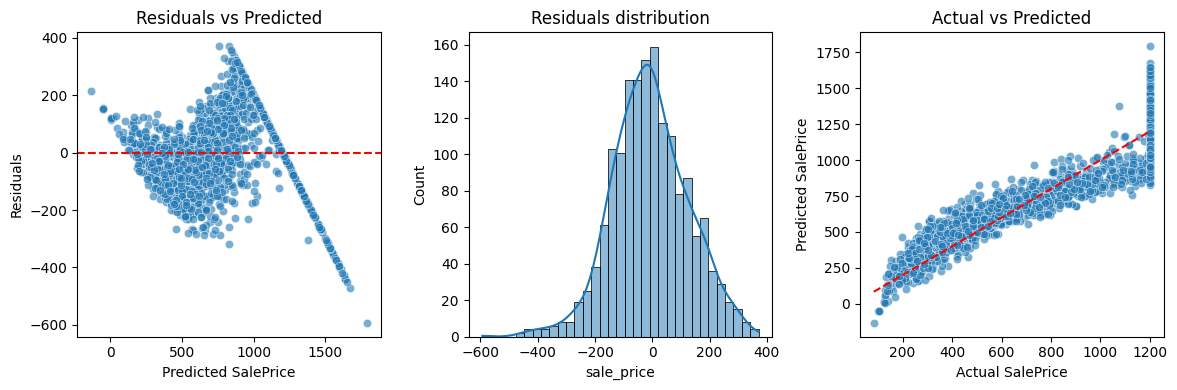

In [19]:
y_pred_test = linreg_pipeline.predict(X_test)

# If we transformed target earlier, inverse transform predictions and y_test
if transform_target:
    y_test_inv = np.expm1(y_test)
    y_pred_inv = np.expm1(y_pred_test)
else:
    y_test_inv = y_test
    y_pred_inv = y_pred_test

# Metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print("\nLinear Regression Performance on Test Set:")
print(f"MAE: {mae:0.4f}")
print(f"MSE: {mse:0.4f}")
print(f"RMSE: {rmse:0.4f}")
print(f"R-squared: {r2:0.4f}")

# Residuals & plots
residuals = y_test_inv - y_pred_inv

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.scatterplot(x=y_pred_inv, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

plt.subplot(1,3,2)
sns.histplot(residuals, kde=True)
plt.title("Residuals distribution")

plt.subplot(1,3,3)
sns.scatterplot(x=y_test_inv, y=y_pred_inv, alpha=0.6)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')  # parity line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()
